# Réseau de neurones à 2 couches "from scratch"

Ce notebook a pour but de démontrer comment implémenter un réseau de neurones à deux couches sans utiliser de framework de deep learning (comme TensorFlow ou PyTorch), et l'appliquer à un problème non-linéaire de classification. Nous allons générer un jeu de données synthétique en forme de cercles imbriqués, construire manuellement le modèle avec une propagation avant et arrière, entraîner le réseau en utilisant la descente de gradient, visualiser l’évolution de la performance au fil des itérations et évaluer la précision du modèle sur l’ensemble d’entraînement.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score, log_loss

## Génération d'un dataset

Dimensions of X: (2, 100)
Dimensions of y: (1, 100)


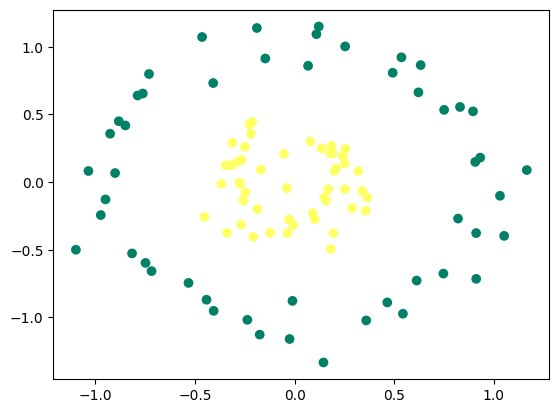

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print("Dimensions of X:", X.shape)
print("Dimensions of y:", y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

## Les fonctions clés

### Initialisation

In [3]:
def initialisation(n0, n1, n2):
    W1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)
    
    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

### La Forward Propagation

In [4]:
def forward_propagation(X, parametres):
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))

    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1': A1,
        'A2': A2
    }

    return activations

### La Back Propagation

In [5]:
def backward_propagation(X, y, activations, parametres):
    m = y.shape[1]

    A1 = activations['A1']
    A2 = activations['A2']
    W1 = parametres['W1']
    W2 = parametres['W2']

    dZ2 = A2 - y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = W2.T.dot(dZ2) * A1 * (1 - A1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {
        'dW1': dW1,
        'db1': db1,
        'dW2': dW2,
        'db2': db2
    }

    return gradients

### La mise à jour des poids et biais

In [6]:
def update(parametres, gradients, learning_rate):
    
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

### La prédiction

In [7]:
def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    A2 = activations['A2']
    return A2 >= 0.5

## Intégration

### Le neurone

In [8]:
def neural_network(X_train, y_train, n1, learning_rate=0.01, n_iter = 1000):
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    parametres = initialisation(n0, n1, n2)
    train_loss = []
    train_acc = []

    for i in range(n_iter):
        activations = forward_propagation(X_train, parametres)
        gradients = backward_propagation(X_train, y_train, activations, parametres)
        parametres = update(parametres, gradients, learning_rate)

        if i % 10 == 0:
            train_loss.append(log_loss(y_train.flatten(), activations['A2'].flatten()))
            y_pred = predict(X_train, parametres)
            current_accuracy = accuracy_score(y_train.flatten(), y_pred.flatten())
            train_acc.append(current_accuracy)

    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train Accuracy')
    plt.legend()
    plt.show()

    return parametres

### Création du neurone et enregistement des paramètres

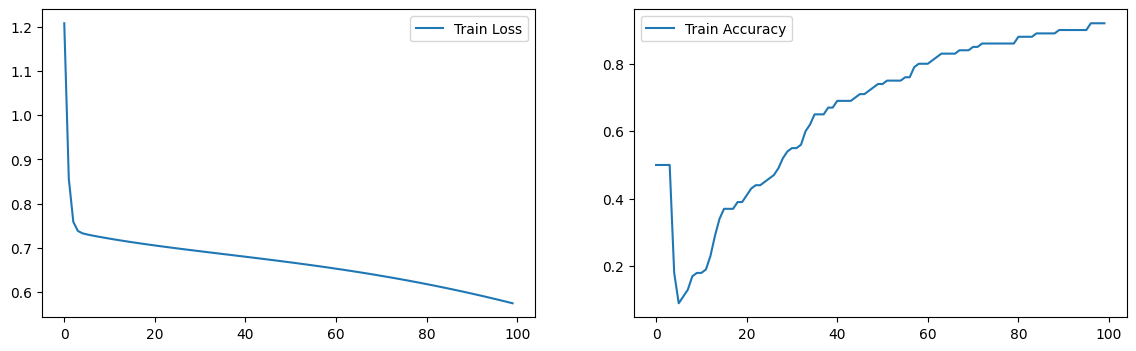

In [9]:
parametres = neural_network(X, y, n1 = 8, n_iter=1000, learning_rate=0.1)